In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [9]:
df_can=pd.read_excel('Canada.xlsx',sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)

In [10]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_can.drop(['Coverage','AREA','REG','Type','DEV'], axis=1, inplace=True)

In [12]:
df_can.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"}, inplace=True)

In [13]:
df_can.drop(['Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50',], axis=1, inplace=True)

In [14]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can.columns=

In [14]:
df_can2=df_can.set_index("Country")
df_can2["Total"]=df_can2.sum(axis=1)

In [16]:
df_can2

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [15]:

years=range(1980,2014)
df_dsn=df_can2.loc[['Denmark','Sweden','Norway'], years]
df_dsn["Total"]=df_dsn.sum(axis=1)


In [16]:
df_dsn

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,62,101,97,108,81,92,93,94,81,3901
Sweden,281,308,222,176,128,158,187,198,171,182,...,205,139,193,165,167,159,134,140,140,5866
Norway,116,77,106,51,31,54,56,80,73,76,...,57,53,73,66,75,46,49,53,59,2327


In [17]:
total_for_dsn=sum(df_dsn["Total"])
for Country in df_dsn:
    print("Country",Country)

Country 1980
Country 1981
Country 1982
Country 1983
Country 1984
Country 1985
Country 1986
Country 1987
Country 1988
Country 1989
Country 1990
Country 1991
Country 1992
Country 1993
Country 1994
Country 1995
Country 1996
Country 1997
Country 1998
Country 1999
Country 2000
Country 2001
Country 2002
Country 2003
Country 2004
Country 2005
Country 2006
Country 2007
Country 2008
Country 2009
Country 2010
Country 2011
Country 2012
Country 2013
Country Total


In [18]:
country_proportions=[(float(value)/total_for_dsn) for value in df_dsn["Total"]]
for idx, porsion in enumerate(country_proportions):
    print(df_dsn.index.values[idx],porsion)

Denmark 0.32255663965602777
Sweden 0.48503390110798744
Norway 0.1924094592359848


In [21]:
total_for_dsn

12094

In [22]:
width, height=(50,10)

In [23]:
total_tiles=width*height
total_tiles

500

In [24]:
tiles_per_country=[round(propor*total_tiles) for propor in country_proportions]

In [25]:
tiles_per_country

[161, 243, 96]

In [26]:
nilai=[2,3,4,5,6]
kuadrat=[round(nilai2**2) for nilai2 in nilai]

In [59]:
kuadrat

[4, 9, 16, 25, 36]

In [27]:
tile_index=0
country_index=0
waffle_chart=np.zeros((height,width))
for col in range(width):
    for row in range(height):
        tile_index+=1
        print(tile_index,sum(tiles_per_country[0:country_index]))
        if tile_index > sum(tiles_per_country[0: country_index]):
            country_index+=1
        waffle_chart[row,col]=country_index
        

1 0
2 161
3 161
4 161
5 161
6 161
7 161
8 161
9 161
10 161
11 161
12 161
13 161
14 161
15 161
16 161
17 161
18 161
19 161
20 161
21 161
22 161
23 161
24 161
25 161
26 161
27 161
28 161
29 161
30 161
31 161
32 161
33 161
34 161
35 161
36 161
37 161
38 161
39 161
40 161
41 161
42 161
43 161
44 161
45 161
46 161
47 161
48 161
49 161
50 161
51 161
52 161
53 161
54 161
55 161
56 161
57 161
58 161
59 161
60 161
61 161
62 161
63 161
64 161
65 161
66 161
67 161
68 161
69 161
70 161
71 161
72 161
73 161
74 161
75 161
76 161
77 161
78 161
79 161
80 161
81 161
82 161
83 161
84 161
85 161
86 161
87 161
88 161
89 161
90 161
91 161
92 161
93 161
94 161
95 161
96 161
97 161
98 161
99 161
100 161
101 161
102 161
103 161
104 161
105 161
106 161
107 161
108 161
109 161
110 161
111 161
112 161
113 161
114 161
115 161
116 161
117 161
118 161
119 161
120 161
121 161
122 161
123 161
124 161
125 161
126 161
127 161
128 161
129 161
130 161
131 161
132 161
133 161
134 161
135 161
136 161
137 161
138 161
139 16

In [28]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [29]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

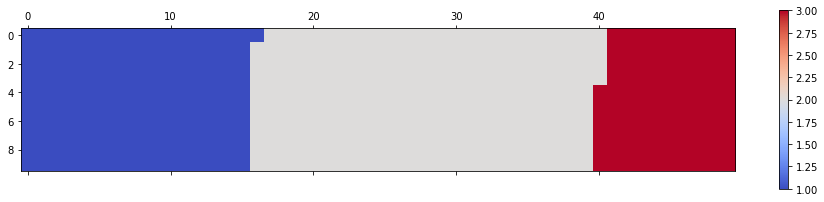

In [30]:
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

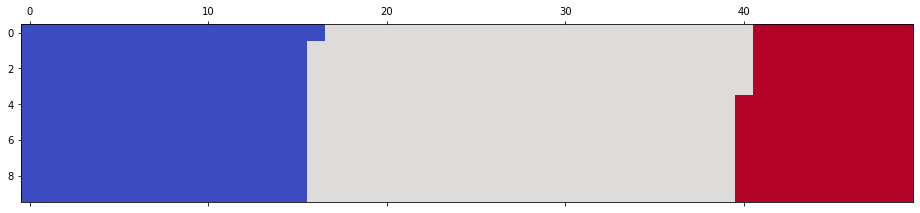

([], [])

<Figure size 432x288 with 0 Axes>

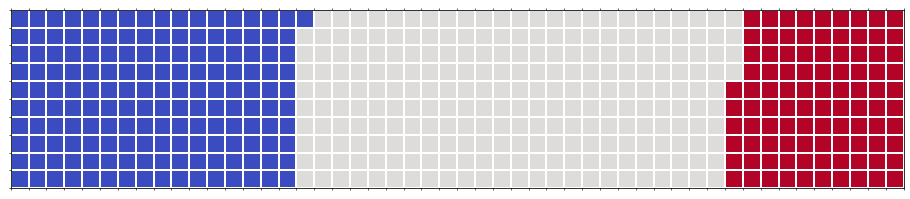

In [31]:
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
ax=plt.gca()
ax.set_xticks(np.arange(-.5,width, 1), minor=True)
ax.set_yticks(np.arange(-.5,height,1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

In [6]:
#fungsi untuk menggunakan waffle chart
def create_waffle(countries, height, width, colormap, total):
    total_values=sum(total)
    country_proportions=[(float(value)/total_values) for value in total]
    total_tiles=width*height
    
    tiles_per_country=[round(propor*total_tiles) for propor in country_proportions]
    
    for idx, porsion in enumerate(country_proportions):
        print(df_dsn.index.values[idx],porsion)
    
    tile_index=0
    country_index=0
    waffle_chart=np.zeros((height,width))
    
    for col in range(width):
        for row in range(height):
            tile_index+=1
            print(tile_index,sum(tiles_per_country[0:country_index]))
            if tile_index > sum(tiles_per_country[0: country_index]):
                country_index+=1
        waffle_chart[row,col]=country_index
        
    fig=plt.figure()
    colormap=plt.cm.coolwarm
    plt.matshow(waffle_chart,cmap=colormap)
    ax=plt.gca()
    ax.set_xticks(np.arange(-.5,width, 1), minor=True)
    ax.set_yticks(np.arange(-.5,height,1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.xticks([])
    plt.yticks([])

In [20]:
df_dsn["Total"]=df_dsn.sum(axis=1)
width=50
height=10
countries=df_can.set_index("Country")
total=countries["Total"].sum(axis=1)
colormap=plt.cm.collwarm

create_waffle(width, height, countries, total, colormap)

KeyError: 'Total'

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
import requests
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
r = requests.get(url, allow_redirects=True)
open('alice.txt', 'wb').write(r.content)

145192

In [4]:
alice_novel=open('./alice_novel.txt','r').read()

In [5]:
stopwords=set(STOPWORDS)

In [6]:
alice_word_count=WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
alice_word_count.generate(alice_novel)

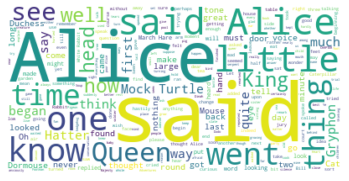

In [10]:
plt.imshow(alice_word_count, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


seaborn

In [2]:
import seaborn as sns

In [32]:
data_years=df_can2[years]

In [33]:
data_years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [41]:
df_total_years=pd.DataFrame((data_years).sum(axis=0))

In [36]:
df_total_years

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [42]:
df_total_years.reset_index(inplace=True)

In [43]:
df_total_years

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


In [44]:
df_total_years.index=map(float,df_total_years.index)

In [45]:
df_total_years.reset_index(inplace=True)

In [49]:
df_total_years.columns=["year","total"]

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

MAP

In [52]:
data=[1,2,3,4,5,6,7,8]
#map(function, list)
def quadrat(val):
    return val**2

data_kuadrat=map(quadrat, data)
print(list(data_kuadrat))

[1, 4, 9, 16, 25, 36, 49, 64]
